## Import

In [1]:
#Import Libraries
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans
import pylab as pl

In [2]:
%matplotlib inline

In [3]:
#Path
path = r'C:\Users\savet\Desktop\Career Foundry\Achievement 6'

In [4]:
#Import Dataset
df = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'cleaned.csv'))

In [5]:
df.shape

(9237, 11)

In [6]:
df.head()

Unnamed: 0 Currency  Price            Boat Type                 Type  \
0           0      CHF   3337          Motor Yacht  new boat from stock   
1           1      EUR   3490  Center console boat  new boat from stock   
2           2      DKK  25900           Sport Boat  new boat from stock   
3           3      EUR   3399         Fishing Boat  new boat from stock   
4           4      CHF   3600            Catamaran            Used boat   

   Year Built  Length  Width  Number of views last 7 days      Country  \
0        2017    4.00   1.90                          226  Switzerland   
1        2020    4.00   1.50                           75      Germany   
2        2020    3.00   1.00                           64      Denmark   
3        2019    3.55   1.46                           58      Germany   
4        1999    6.20   2.38                          474  Switzerland   

  Continent  
0    Europe  
1    Europe  
2    Europe  
3    Europe  
4    Europe

### Preparing columns for subset

In [7]:
price = df['Price']/100000
views = df['Number of views last 7 days']/100

Price will equal the number times 100,000.
Views now equal the number times 100.

In [8]:
price.head()

0    0.03337
1    0.03490
2    0.25900
3    0.03399
4    0.03600
Name: Price, dtype: float64

## Create Subset

In [9]:
subset = df[['Price','Year Built','Length','Width','Number of views last 7 days']]

In [10]:
subset['Price'] = price
subset['Number of views last 7 days'] = views

C:\Users\savet\AppData\Local\Temp\ipykernel_12692\717770619.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset['Price'] = price
C:\Users\savet\AppData\Local\Temp\ipykernel_12692\717770619.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset['Number of views last 7 days'] = views


In [11]:
subset.shape

(9237, 5)

In [12]:
subset.describe()

Price   Year Built       Length        Width  \
count  9237.000000  9237.000000  9237.000000  9237.000000   
mean      3.201941  2004.935693    11.718207     3.552719   
std       9.791929    16.387654     5.998163     1.212105   
min       0.033000  1885.000000     1.040000     0.010000   
25%       0.450000  1999.000000     7.560000     2.550000   
50%       0.980000  2008.000000    10.500000     3.390000   
75%       2.590000  2018.000000    14.000000     4.260000   
max     310.000000  2021.000000   100.000000    25.160000   

       Number of views last 7 days  
count                  9237.000000  
mean                      1.504652  
std                       1.551325  
min                       0.130000  
25%                       0.700000  
50%                       1.080000  
75%                       1.720000  
max                      32.630000

In [13]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [14]:
score = [kmeans[i].fit(subset).score(subset) for i in range(len(kmeans))]

score

C:\Users\savet\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\savet\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\savet\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\savet\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of

[-3734030.084397722,
 -2313243.077494337,
 -1759915.4019460005,
 -1215297.0839824446,
 -919935.1048303691,
 -728719.5398907333,
 -607546.7398525793,
 -505362.9736830871,
 -455949.48515443667]

### Create Elbow Curve

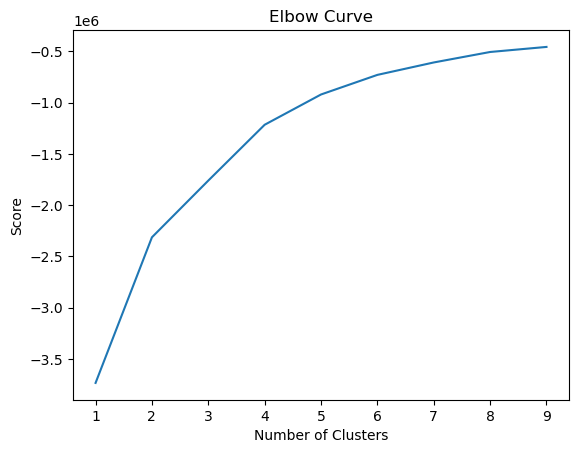

In [15]:
pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

I will be using four clusters with the k-means algorithm.  Depending on the results, I may do the k-means algorithm using three clusters.

In [16]:
kmeans = KMeans(n_clusters = 4) 

In [17]:
kmeans.fit(subset)

C:\Users\savet\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=4)

In [18]:
subset['clusters'] = kmeans.fit_predict(subset)

C:\Users\savet\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\savet\AppData\Local\Temp\ipykernel_12692\100664328.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset['clusters'] = kmeans.fit_predict(subset)


In [19]:
subset['clusters'].value_counts()

clusters
1    6409
0    2559
2     179
3      90
Name: count, dtype: int64

## Create Scatterplots

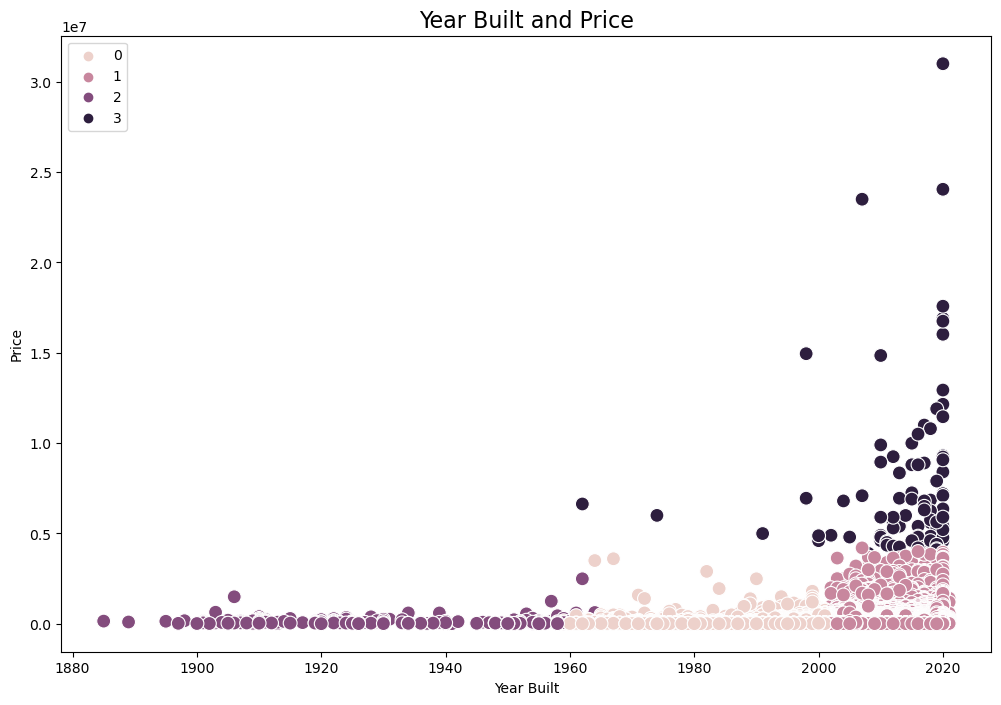

In [20]:
plt.figure(figsize=(12,8))
YBP = sb.scatterplot(x=subset['Year Built'], y=df['Price'], hue=kmeans.labels_, s=100) 


YBP.grid(False) 
plt.xlabel('Year Built') 
plt.ylabel('Price') 
plt.title('Year Built and Price', fontsize=16)
plt.show()


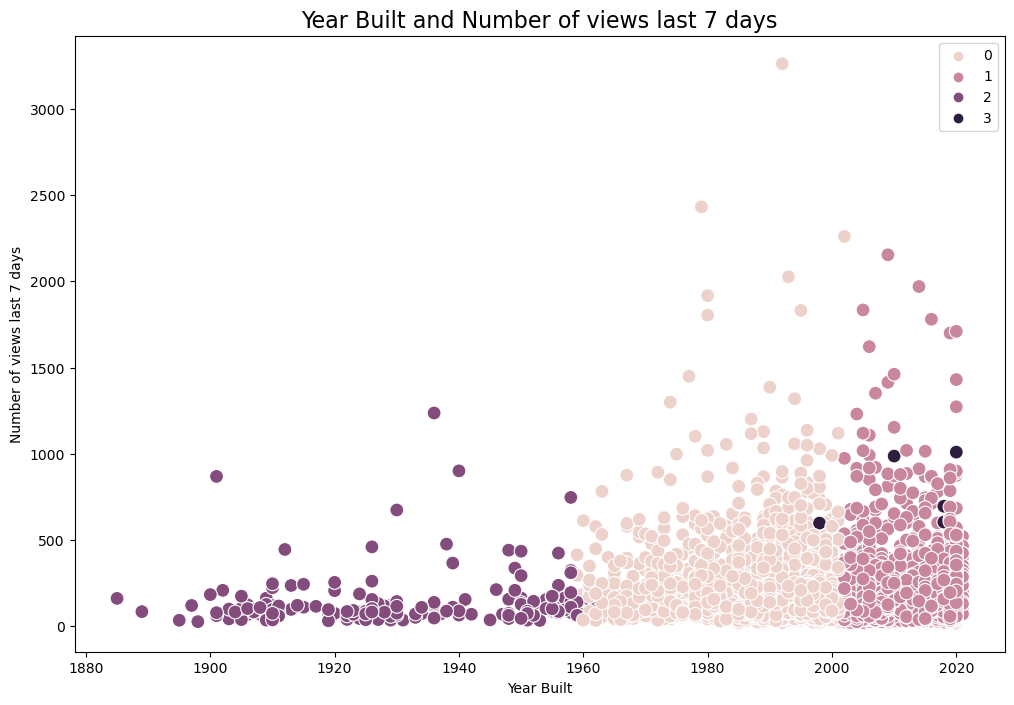

In [21]:
plt.figure(figsize=(12,8))
ax = sb.scatterplot(x=subset['Year Built'], y=df['Number of views last 7 days'], hue=kmeans.labels_, s=100) 


ax.grid(False) 
plt.xlabel('Year Built') 
plt.ylabel('Number of views last 7 days') 
plt.title('Year Built and Number of views last 7 days', fontsize=16)
plt.show()

From looking at the to scatterplots, the price of boats increases for newer boats.  Also, more customers seem interested in newer boats then older ones.

In [22]:
des_clusters = subset.groupby('clusters').agg({'Price':['mean', 'median'], 
                         'Year Built':['min','median','max'], 
                         'Number of views last 7 days':['mean', 'median']})

In [23]:
des_clusters

Price         Year Built                \
               mean  median        min  median   max   
clusters                                               
0          1.130443   0.599       1959  1992.0  2002   
1          3.020068   1.300       2002  2013.0  2021   
2          1.484055   0.788       1885  1929.0  1964   
3         78.469614  61.250       1962  2016.0  2020   

         Number of views last 7 days         
                                mean median  
clusters                                     
0                           1.926335   1.34  
1                           1.334275   1.00  
2                           1.403966   0.93  
3                           1.847778   1.31

In [24]:
des_clusters.reset_index()

clusters      Price         Year Built                \
                 mean  median        min  median   max   
0        0   1.130443   0.599       1959  1992.0  2002   
1        1   3.020068   1.300       2002  2013.0  2021   
2        2   1.484055   0.788       1885  1929.0  1964   
3        3  78.469614  61.250       1962  2016.0  2020   

  Number of views last 7 days         
                         mean median  
0                    1.926335   1.34  
1                    1.334275   1.00  
2                    1.403966   0.93  
3                    1.847778   1.31

Even without looking at the table, it was clear that there are overlaps with the clusters.  The table has made it clearer as to where those overlaps occur.  The fact that there are overlaps could mean looking at the data as a whole and not clusters may be just as beneficial as looking at the clusters.  Even from previous visuals created in previous exercises, it became apparent that the year a boat was built had more of an impact on price where someone might think the size of a boat would be the greatest factor in the cost of a boat. This could be a combination of newer technology, trust in updated methods, and inflation.  

## Exporting

In [25]:
YBP.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'Year Built vs Price.png'),bbox_inches='tight')

In [26]:
ax.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'Year Built vs Number of Views Last 7 Days.png'),bbox_inches='tight')